In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [72]:
import seaborn as sns
data=sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [73]:
x=data[["petal_length","petal_width"]]
x

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [74]:
y=data['species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [75]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=le.fit_transform(y)
y=pd.DataFrame(df,columns=['mm'])

In [76]:
from sklearn.svm import SVC

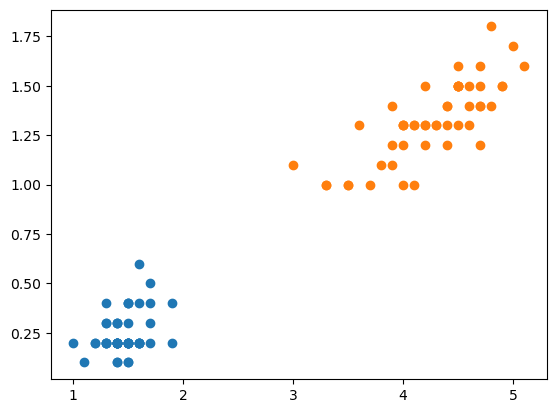

In [77]:
plt.scatter(x['petal_length'][y['mm']==0],x['petal_width'][y['mm']==0])
plt.scatter(x['petal_length'][y['mm']==1],x['petal_width'][y['mm']==1])

In [128]:
model=SVC(kernel="linear",C=1e6)
model.fit(x,df)

SVC(C=1000000.0, kernel='linear')

In [129]:
model.coef_

array([[ -1.29411744,  -0.82352928],
       [ -0.61538458,  -0.30769229],
       [ -4.30791672, -10.15505314]])

In [130]:
model.intercept_

array([ 3.78823471,  2.2923075 , 38.76820728])

In [131]:
def plot_svc(model,xmin,xmax):
    w=model.coef_[0]
    b=model.intercept_[0]
    x0=np.linspace(xmin,xmax,200)
    d_b=-w[0]/w[1]*x0-b/w[1]
    margin=1/w[1]
    g_u=d_b+margin
    g_l=d_b-margin
    svs=model.support_vectors_
    plt.scatter(svs[:,0],svs[:,1],s=180,facecolors='#FFAAAA')
    plt.plot(x0,d_b,'k-')
    plt.plot(x0,g_u,'k--')
    plt.plot(x0,g_l,'k--')

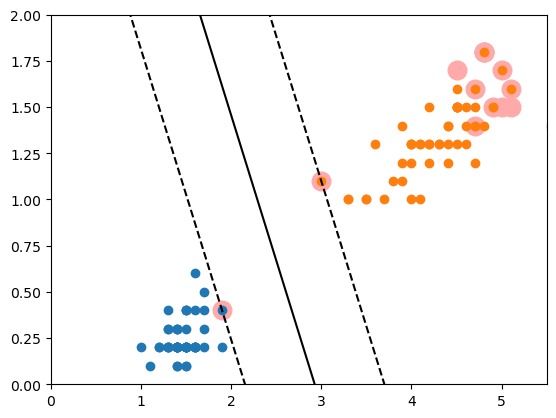

In [132]:
plot_svc(model,0,5.5)
plt.scatter(x['petal_length'][y['mm']==0],x['petal_width'][y['mm']==0])
plt.scatter(x['petal_length'][y['mm']==1],x['petal_width'][y['mm']==1])
plt.axis([0,5.5,0,2])
plt.show()

In [133]:
model.support_vectors_

array([[1.9, 0.4],
       [4.7, 1.6],
       [4.7, 1.4],
       [4.8, 1.8],
       [4.9, 1.5],
       [5. , 1.7],
       [5.1, 1.6],
       [3. , 1.1],
       [4.5, 1.7],
       [5. , 1.5],
       [4.8, 1.8],
       [5.1, 1.5],
       [5.6, 1.4],
       [4.8, 1.8]])